In [29]:
# Credentials - Karan Sharma / kasham1991@gmail.comAnalysis Tasks to be performed:

# 1. Build a model of housing prices to predict median house values in California using the provided dataset.
# 2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.
# 3. Predict housing prices based on median_income and plot the regression chart for it.

In [30]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [31]:
# Importing the dataset
housing = pd.read_excel('C:\\Datasets\\Housing.xlsx')
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [32]:
housing.info()
# housing.size
# housing.shape

# Exploratory Data Analysis
# 20640 corresponds to the number of districts, 10 responds to the characteristics prevailing in each district
# One categorical variable - ocean_proximity
# median_house_value is the median sales of each district

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [33]:
# Looking at the basic statistics
housing.describe()
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [34]:
# Checking for null values
# total bedrooms has 207 NaN values
housing.isnull()
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [35]:
# Dropping null values
housing.dropna(inplace = True)

In [36]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [37]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [38]:
# Encode categorical data - Convert categorical to numerical data
# The feature column ocean_proximity is in categorical format
# The are multiple ways to convert categorical data - label encoding, binary encone, dummies, etc
# Pandas supports many more methods for the same

# Label encoding involves converting each value from the column into a number
# Ocean_proximity -'Near Bay' | '<1H Ocean' | 'Inland' | 'Near Ocean' | 'Island'
# Assigning a specific number 
# <1H Ocean = 0, Inland = 1, Island = 2, Near Bay = 3, Near Ocean = 4

from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

In [39]:
# Converting the column from object to category
housing['ocean_proximity'] = housing['ocean_proximity'].astype('category')
housing.dtypes

longitude              float64
latitude               float64
housing_median_age       int64
total_rooms              int64
total_bedrooms         float64
population               int64
households               int64
median_income          float64
ocean_proximity       category
median_house_value       int64
dtype: object

In [40]:
# Assigning the encoded variable to a new column using the cat.codes accesor
housing['ocean_proximity_value'] = housing['ocean_proximity'].cat.codes
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,ocean_proximity_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,3


In [41]:
# Since we are using regression analysis, it is better to standardize the data
# Standardization involves shifting the distribution of each data point to a mean of 0 and an SD of 1
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x =  pd.DataFrame(sc_x.fit_transform(housing.drop(["ocean_proximity", "median_house_value"], axis = 1),),
        columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_value'])
x.head()
# x.shape

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_value
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,1.291351
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.291351
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.291351
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.291351
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.291351


In [42]:
# Standardizing the target variable - median_house_value
y = pd.DataFrame(sc_x.fit_transform(housing.drop(['ocean_proximity','longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_value' ], axis = 1),),
                 columns=['median_house_value'])
y.head()
# y.shape

,median_house_value
0,2.128819
1,1.313626
2,1.258183
3,1.164622
4,1.172418


In [43]:
# splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 1,)

In [44]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [45]:
# Printing the coefficients and intercept
print(model1.intercept_)
print(model1.coef_)

[0.00280687]
[[-0.74612343 -0.79186502  0.12810082 -0.15758988  0.41665016 -0.36991155
   0.15622207  0.66336783  0.00130051]]


In [46]:
# Predicting on the test data
y_p = model1.predict(x_test)
print(y_p)
print(y_test)

[[ 1.47657526]
 [ 0.5809054 ]
 [-0.51896355]
 ...
 [-0.62287874]
 [ 1.92401337]
 [ 0.58810714]]
       median_house_value
6643             1.334417
4084             0.733202
15284           -0.654618
20068            2.539456
11726           -0.762906
...                   ...
6607             0.307846
9765             0.096468
9364            -1.187395
16981            2.539456
3933             0.115527

[4087 rows x 1 columns]


In [47]:
# Calculating the Root Mean Squared Error - RMSE
# Test and train scores
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_p)))
print(np.sqrt(metrics.mean_squared_error(y_train, model1.predict(x_train))))

0.5949339345602463
0.6045058776630716


In [48]:
# Univariate regression
x1 = x[['median_income']]
y1 = y[['median_house_value']]

In [49]:
# Splitting the data
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = .20, random_state = 1,)

In [50]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(x1_train, y1_train)

LinearRegression()

In [51]:
# Printing the coefficients and intercept
print(model2.intercept_)
print(model2.coef_)

[0.00341938]
[[0.68861017]]


In [52]:
# Predicting on the test data
y_p1 = model2.predict(x1_test)
print(y_p1)
print(y1_test)

[[ 1.39584913]
 [ 0.52009629]
 [-0.38636627]
 ...
 [-0.85803426]
 [ 1.58873665]
 [ 0.46574697]]
       median_house_value
6643             1.334417
4084             0.733202
15284           -0.654618
20068            2.539456
11726           -0.762906
...                   ...
6607             0.307846
9765             0.096468
9364            -1.187395
16981            2.539456
3933             0.115527

[4087 rows x 1 columns]


In [53]:
# Calculating the Root Mean Squared Error - RMSE
# Test and train scores
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y1_test, y_p1)))
print(np.sqrt(metrics.mean_squared_error(y1_train, model2.predict(x1_train))))

0.7103347089635073
0.7290952831251405


Text(0.5, 1.0, 'Model Prediction Chart')

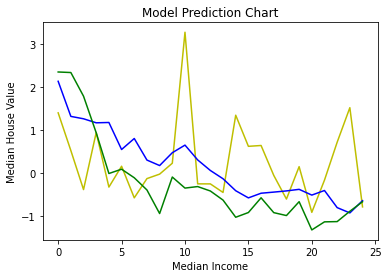

In [54]:
# Lets plot the fitted model2 with the revised dataset
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(y_p1[0:25], 'y')
plt.plot(y1[0:25], 'b')
plt.plot(x1[0:25], 'g')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Model Prediction Chart')

In [ ]:
# Thank You :) 